In [31]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [4]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [76]:
print(iris.target_names)


['setosa' 'versicolor' 'virginica']


In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('target', axis=1)
y = df['target']

In [32]:
X_noisy = X + np.random.normal(0, 0.5, X.shape)

X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
y_pred_knn = knn.predict(X_test)

In [37]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitude de KNN: {accuracy_knn}")

Exactitude de KNN: 0.8444444444444444


In [39]:
from sklearn.svm import SVC

In [51]:
svm = SVC(kernel='linear')

In [52]:
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [53]:
y_pred_svm = svm.predict(X_test)

In [54]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitude de SVM: {accuracy_svm}")

Exactitude de SVM: 0.8444444444444444


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree = DecisionTreeClassifier()

In [57]:
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [58]:
y_pred_tree = tree.predict(X_test)

In [59]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Exactitude de l'Arbre de Décision: {accuracy_tree}")

Exactitude de l'Arbre de Décision: 0.8222222222222222


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
forest = RandomForestClassifier(n_estimators=100)

In [62]:
forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [63]:
y_pred_forest = forest.predict(X_test)

In [64]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Exactitude de Random Forest: {accuracy_forest}")

Exactitude de Random Forest: 0.8444444444444444


In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg = LogisticRegression(max_iter=200)

In [67]:
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [68]:
y_pred_logreg = logreg.predict(X_test)

In [69]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Exactitude de la Régression Logistique: {accuracy_logreg}")

Exactitude de la Régression Logistique: 0.8444444444444444


In [70]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Exactitude de Naïve Bayes: {accuracy_gnb}")

Exactitude de Naïve Bayes: 0.8888888888888888


In [71]:
print(f"Exactitude KNN: {accuracy_knn}")
print(f"Exactitude SVM: {accuracy_svm}")
print(f"Exactitude Decision Tree: {accuracy_tree}")
print(f"Exactitude Random Forest: {accuracy_forest}")
print(f"Exactitude Régression Logistique: {accuracy_logreg}")
print(f"Exactitude Naïve Bayes: {accuracy_gnb}")

Exactitude KNN: 0.8444444444444444
Exactitude SVM: 0.8444444444444444
Exactitude Decision Tree: 0.8222222222222222
Exactitude Random Forest: 0.8444444444444444
Exactitude Régression Logistique: 0.8444444444444444
Exactitude Naïve Bayes: 0.8888888888888888


In [77]:
results = {
    'Algorithme': ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Régression Logistique', 'Naïve Bayes'],
    'Exactitude': [accuracy_knn, accuracy_svm, accuracy_tree, accuracy_forest, accuracy_logreg, accuracy_gnb]
}

results_df = pd.DataFrame(results)
print(results_df)

              Algorithme  Exactitude
0                    KNN    0.844444
1                    SVM    0.844444
2          Decision Tree    0.822222
3          Random Forest    0.844444
4  Régression Logistique    0.844444
5            Naïve Bayes    0.888889


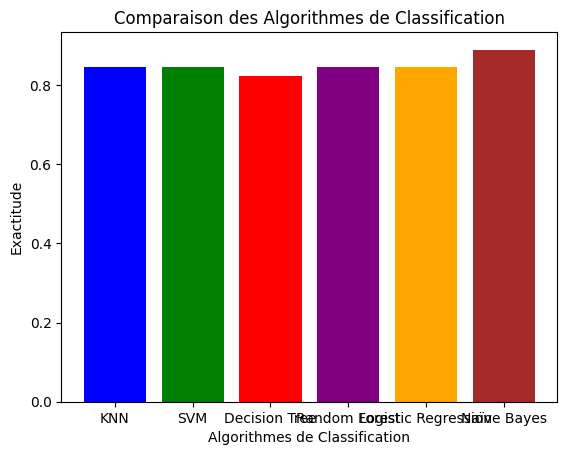

In [72]:
import matplotlib.pyplot as plt
algos = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naïve Bayes']
accuracies = [accuracy_knn, accuracy_svm, accuracy_tree, accuracy_forest, accuracy_logreg,
accuracy_gnb]
plt.bar(algos, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Algorithmes de Classification')
plt.ylabel('Exactitude')
plt.title('Comparaison des Algorithmes de Classification')
plt.show()